In [243]:
import os
import pytesseract
import numpy as np
from PIL import Image, ImageEnhance
from scipy.spatial.distance import cdist
pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"

pytesseract.get_languages()

['eng', 'equ', 'osd', 'rus']

In [42]:
xml = pytesseract.image_to_alto_xml('images\photo_5242691713384977361_y.jpg', lang='rus').decode('utf-8')


In [44]:
import xml.etree.ElementTree as ET

root = ET.fromstring(xml)

In [45]:
for el in root.findall('TextBlock'):
    print(el.tag)

In [35]:
for el in root:
    print(el.tag)
    # print(el.text)
    # print(el.attrib)

{http://www.loc.gov/standards/alto/ns-v3#}Description
{http://www.loc.gov/standards/alto/ns-v3#}Layout


In [9]:
data = pytesseract.image_to_string('images\photo_5242691713384977361_y.jpg', lang='rus') 

data

'19:39\n\nУровень за\n\nЭл. велосипед [8 28099 - АА177Т\nГ 55.77066 37.62820\n\n© 6Р3\n\n(Р) Парковка № р18981\n\n(© 04.05.2025 19:37\n\nДоступен В городе\n\nЗаменить\nбатарею\n\nПоиск велосипеда\n\n>) Посигналить\n'

In [15]:
# df = pytesseract.image_to_data('images\photo_5240131148372373345_y.jpg', lang='rus', output_type='data.frame')
df = pytesseract.image_to_data('images\photo_5242691713384977361_y.jpg', lang='rus', output_type='data.frame')
# df = pytesseract.image_to_data('images\Screenshot_20250504_193115.jpg', lang='rus', output_type='data.frame')
# df = pytesseract.image_to_data('images\Screenshot_20250504_193921.jpg', lang='rus', output_type='data.frame')

# df

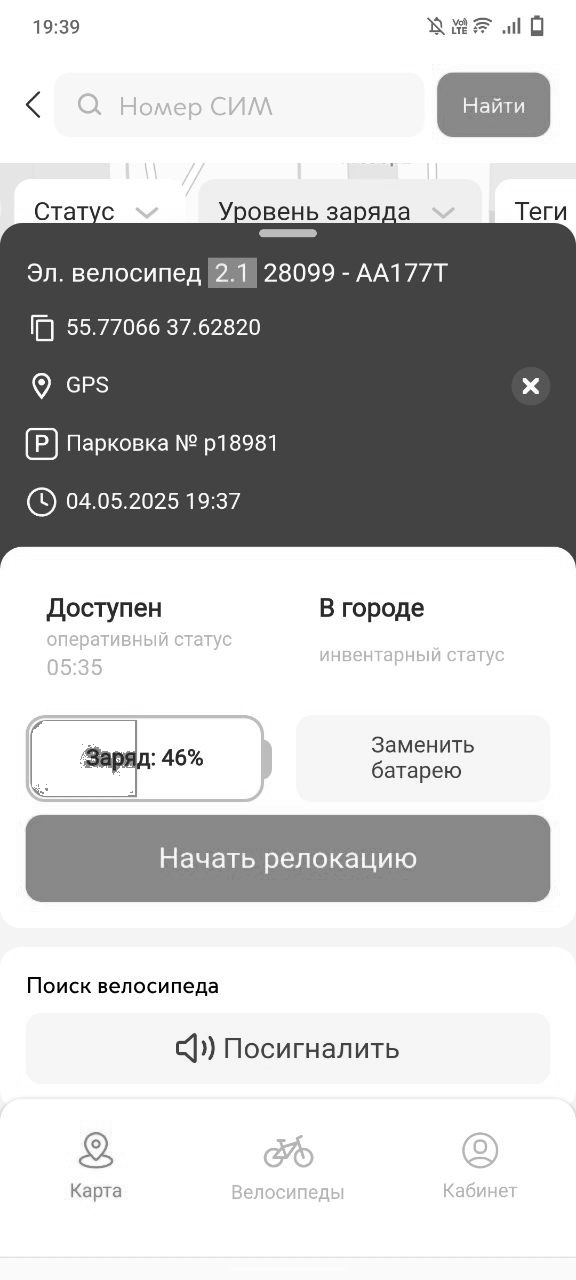

In [177]:
from PIL import Image, ImageEnhance
img = Image.open('images\photo_5242691713384977361_y.jpg')
img = remove_green(img).convert('L')
# img = ImageEnhance.Contrast(img).enhance(10)
df = pytesseract.image_to_data(img, lang='rus', output_type='data.frame')
img

In [179]:
type(df[~df['text'].isna()])

pandas.core.frame.DataFrame

In [32]:
zip((36, 181, 90), (36, 181, 90))

[(36, 36), (181, 181), (90, 90)]

In [168]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [216]:
np.array((20, 150, 30)) @ np.array((20, 150, 30))

np.int64(23800)

In [254]:
def remove_green(image):
    i = np.asarray(image).copy()
    shape = i.shape
    i = i.reshape(-1, 3)

    pixels = np.where(abs(i - (86, 179, 99)).sum(axis=1) <= 20)
    # print(pixels)
    i[pixels] = (255, 255, 255)
    
    i = i.reshape(shape)
    i = Image.fromarray(i)
    # i.show()
    return i

def remove_green1(image):
    green = np.array([(86, 179, 99)])
    i = np.asarray(image).copy()
    shape = i.shape
    i = i.reshape(-1, 3)

    pixels = np.where(cdist(i, green, metric='cosine') < 0.01)[0]
    # print(pixels)
    i[pixels] = (255, 255, 255)
    
    i = i.reshape(shape)
    i = Image.fromarray(i)
    # i.show()
    return i

In [239]:
a = np.array([(20, 150, 30), (30, 160, 20),(10, 10, 120),(2, 123, 123),(87, 41, 3)])

b = np.array([(20, 150, 30)])

np.where(cdist(a, b, metric='cosine') < 0.01)[0]

array([0, 1])

In [266]:
import re

def bike_screenshot_to_string(image):
    ocr_text = pytesseract.image_to_string(image, lang='rus')
    time_pattern = re.compile("\d{2}\:\d{2}")
    bike_num_pattern = re.compile(" 2\d{4} ")
    battery_percent_pattern = re.compile("\d{1,3}%")

    times = re.findall(time_pattern, ocr_text)
    bike_nums = re.findall(bike_num_pattern, ocr_text)
    battery_percents = re.findall(battery_percent_pattern, ocr_text)

    # times, bike_nums, battery_percents

    time = times[0] if times else "НЕ УДАЛОСЬ РАСПОЗНАТЬ ВРЕМЯ"
    bike_num = (bike_nums[0] if bike_nums else "НЕ УДАЛОСЬ РАСПОЗНАТЬ НОМЕР ВЕЛОСИПЕДА").strip()
    battery_percent = battery_percents[-1] if battery_percents else "НЕ УДАЛОСЬ РАСПОЗНАТЬ ПРОЦЕНТ ЗАРЯДА"

    time, bike_num, battery_percent

    return f"{bike_num}\n{battery_percent}\n{time}\n1 раз\n\n"

In [267]:
image_paths = [
    'images\photo_5240131148372373345_y.jpg',
    'images\photo_5242691713384977361_y.jpg',
    'images\Screenshot_20250504_193115.jpg',
    'images\Screenshot_20250504_193921.jpg',
]

result = ""

# for image_path in image_paths:
for image_path in os.listdir('images'):
    image = Image.open('images\\' + image_path)
    # image = Image.open(image_path)
    image = remove_green1(image)
    result += bike_screenshot_to_string(image)

print(result)

26566
33%
23:15
1 раз

26755
НЕ УДАЛОСЬ РАСПОЗНАТЬ ПРОЦЕНТ ЗАРЯДА
НЕ УДАЛОСЬ РАСПОЗНАТЬ ВРЕМЯ
1 раз

28004
НЕ УДАЛОСЬ РАСПОЗНАТЬ ПРОЦЕНТ ЗАРЯДА
НЕ УДАЛОСЬ РАСПОЗНАТЬ ВРЕМЯ
1 раз

22360
24%
19:31
1 раз

22360
24%
19:31
1 раз

22360
24%
19:31
1 раз

22360
24%
19:31
1 раз

22360
24%
19:31
1 раз

22360
24%
19:31
1 раз

28099
46%
19:39
1 раз

22360
24%
19:31
1 раз

22360
24%
19:31
1 раз

28099
46%
19:39
1 раз

28099
46%
19:39
1 раз

28099
46%
19:39
1 раз

26566
33%
23:15
1 раз

26755
НЕ УДАЛОСЬ РАСПОЗНАТЬ ПРОЦЕНТ ЗАРЯДА
23:16
1 раз

28004
2%
23:16
1 раз




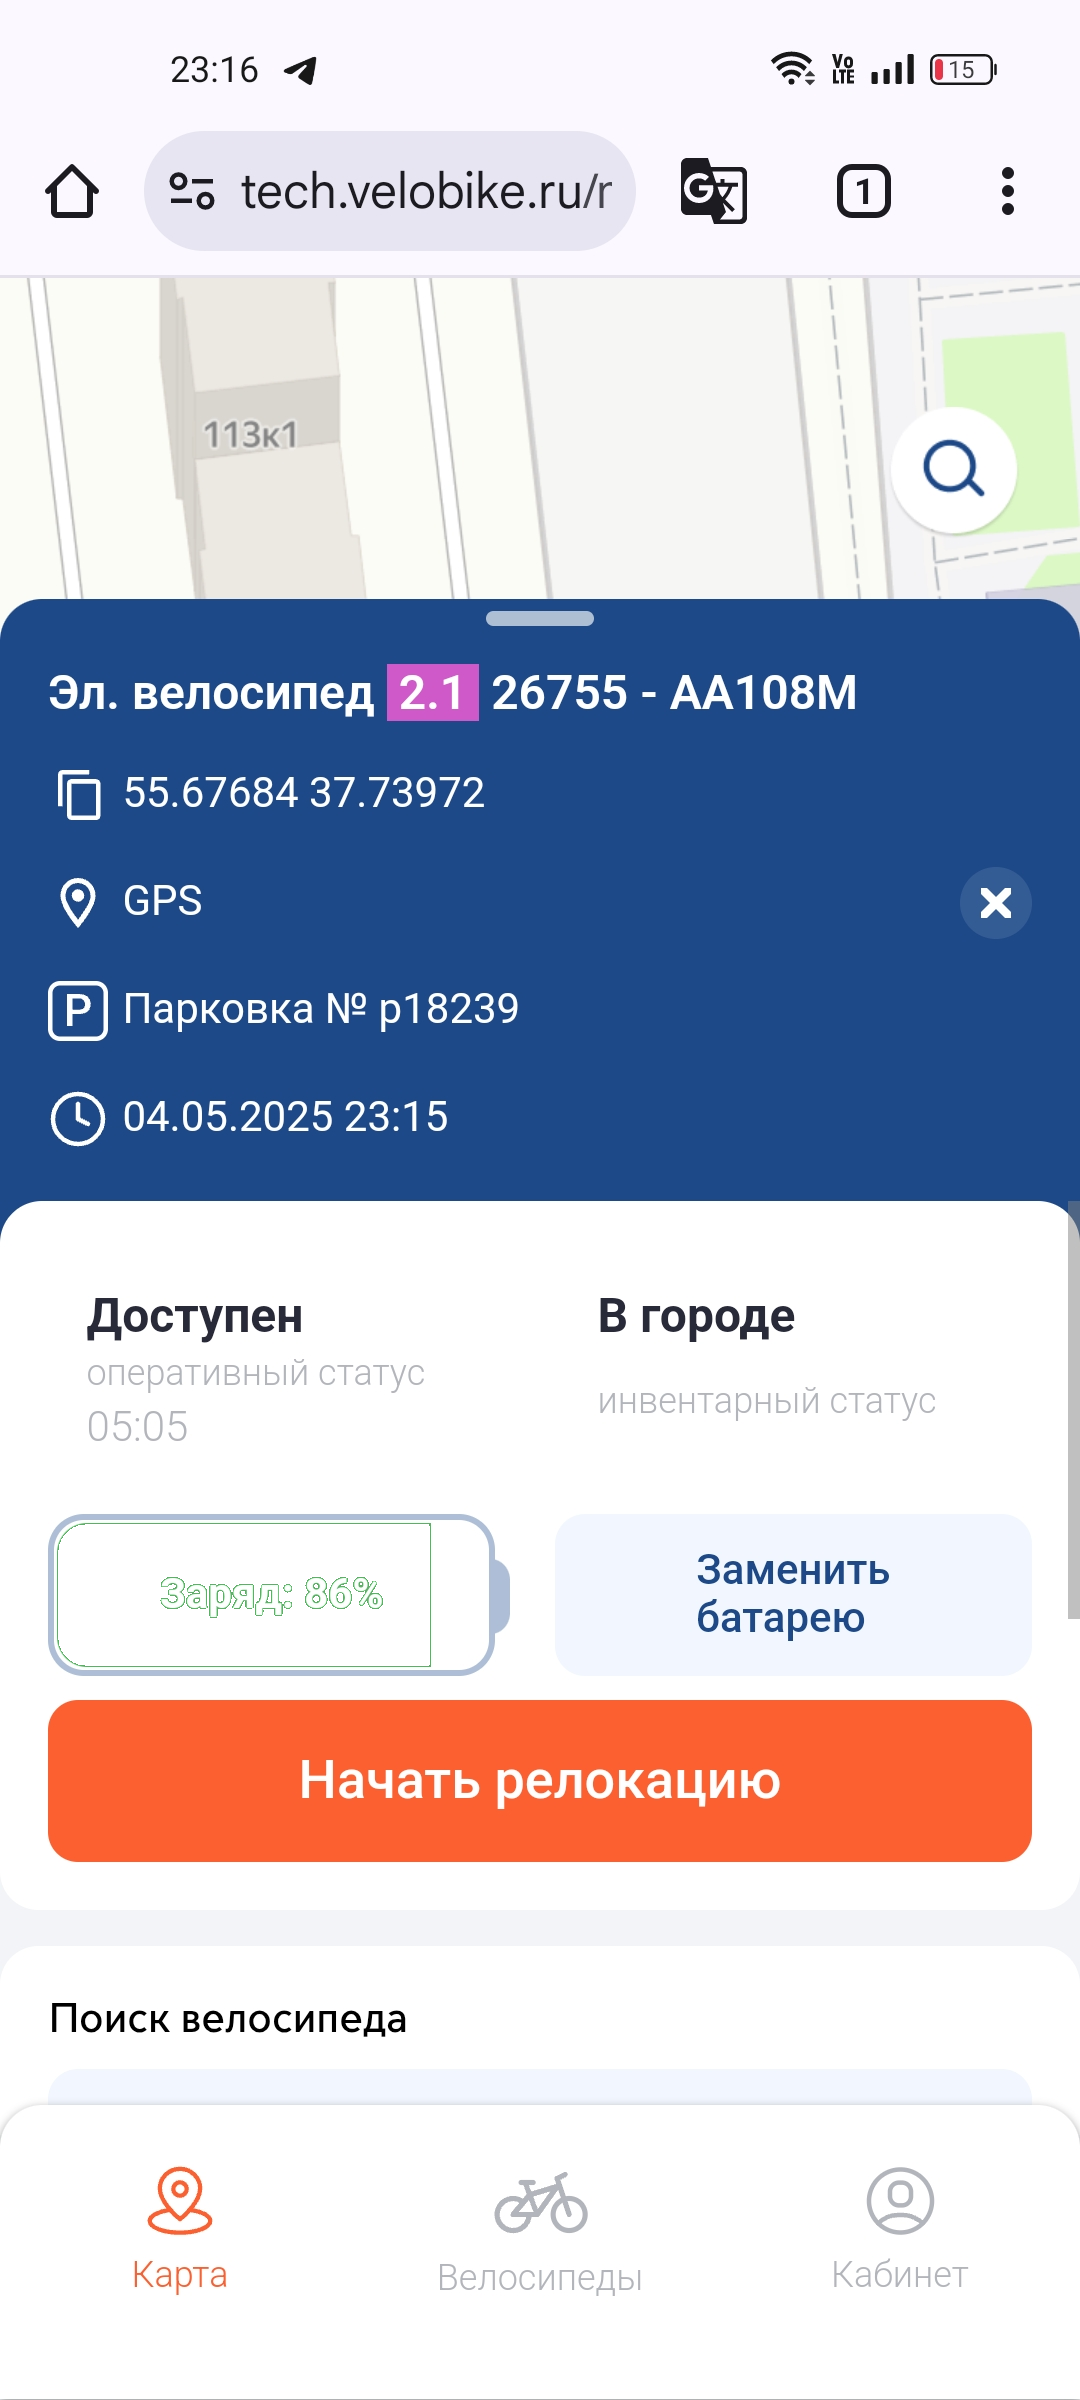

In [264]:
image = Image.open('images\Screenshot_2025_05_04_23_16_33_54_40deb401b9ffe8e1df2f1cc5ba480b12.jpg')
remove_green(image)